<a href="https://colab.research.google.com/github/LuanLindolfo/Visao_Computacional/blob/main/Energia_Classifica%C3%A7%C3%A3o_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho Final Visão Computacional
####Base de dados contendo a média diária de consumo de energia diário em MWmed por região do Brasil (Norte [N], Nordeste [NE], Sudeste/Centro-Oeste [SE] e Sul [S]
####Filtro aplicado para obter a média da região Norte [N] e verificar se o dia é classificado com um dia que potencialmente foi de sobrecarga de energia ou não

Fonte: https://dados.ons.org.br/dataset/carga-energia

Trabalho para fins acadêmicos - Trabalho final da matéria de Visão Computacional

Docente: Prof.dra. Evelin Helena Cardoso Gomes

Discentes: Lais Sansara S. Silva e Luan Evaristo M. Lindolfo

In [176]:
!pip install numpy #para computação numérica, alta performance e ferramentas para operações matemáticas.
!pip -q install plotly #gráficos e dashboards dinâmicos
!pip -q install yellowbrick #visualização de machine learning para avaliar e diagnosticar modelos de forma visual

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
energia1 = pd.read_csv('/content/drive/MyDrive/energia/CARGA_ENERGIA_2025.csv', encoding='latin-1', sep=';')
#A codificação padrão (UTF-8) não conseguiu lidar com alguns caracteres no arquivo
energia1

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,Norte,2025-01-01,7163.468208
1,NE,Nordeste,2025-01-01,11925.967708
2,S,Sul,2025-01-01,11100.247500
3,SE,Sudeste/Centro-Oeste,2025-01-01,35903.900458
4,N,Norte,2025-01-02,7705.155958
...,...,...,...,...
875,SE,Sudeste/Centro-Oeste,2025-08-07,42456.498833
876,N,Norte,2025-08-08,NaN
877,NE,Nordeste,2025-08-08,NaN
878,S,Sul,2025-08-08,NaN


In [180]:
energia2 = pd.read_csv('/content/drive/MyDrive/energia/CARGA_ENERGIA_2024.csv', encoding='latin-1', sep=';')
#A codificação padrão (UTF-8) não conseguiu lidar com alguns caracteres no arquivo
energia2

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,Norte,2024-01-01,6532.986042
1,NE,Nordeste,2024-01-01,11658.740083
2,S,Sul,2024-01-01,10472.403292
3,SE,Sudeste/Centro-Oeste,2024-01-01,35089.386708
4,N,Norte,2024-01-02,7154.334333
...,...,...,...,...
1459,SE,Sudeste/Centro-Oeste,2024-12-30,40639.167375
1460,N,Norte,2024-12-31,7579.586500
1461,NE,Nordeste,2024-12-31,13092.667583
1462,S,Sul,2024-12-31,11997.240667


In [181]:
energia3 = pd.read_csv('/content/drive/MyDrive/energia/CARGA_ENERGIA_2023.csv', encoding='latin-1', sep=';')
#A codificação padrão (UTF-8) não conseguiu lidar com alguns caracteres no arquivo
energia3

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,Norte,2023-01-01,5703.008875
1,NE,Nordeste,2023-01-01,9640.008708
2,S,Sul,2023-01-01,9696.385125
3,SE,Sudeste/Centro-Oeste,2023-01-01,31302.091125
4,N,Norte,2023-01-02,6140.917875
...,...,...,...,...
1455,SE,Sudeste/Centro-Oeste,2023-12-30,42976.404000
1456,N,Norte,2023-12-31,6692.589958
1457,NE,Nordeste,2023-12-31,12350.468917
1458,S,Sul,2023-12-31,10697.375667


In [182]:
energia = pd.concat([energia3, energia2, energia1], ignore_index=True)

In [183]:
energia.head(10)

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,Norte,2023-01-01,5703.008875
1,NE,Nordeste,2023-01-01,9640.008708
2,S,Sul,2023-01-01,9696.385125
3,SE,Sudeste/Centro-Oeste,2023-01-01,31302.091125
4,N,Norte,2023-01-02,6140.917875
5,NE,Nordeste,2023-01-02,10986.797333
6,S,Sul,2023-01-02,12220.868083
7,SE,Sudeste/Centro-Oeste,2023-01-02,37530.289625
8,N,Norte,2023-01-03,6294.462208
9,NE,Nordeste,2023-01-03,11315.432583


In [184]:
energia.tail(10)

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
3794,S,Sul,2025-08-06,13119.766292
3795,SE,Sudeste/Centro-Oeste,2025-08-06,41975.530750
3796,N,Norte,2025-08-07,8576.003833
3797,NE,Nordeste,2025-08-07,12898.990500
3798,S,Sul,2025-08-07,13163.146208
3799,SE,Sudeste/Centro-Oeste,2025-08-07,42456.498833
3800,N,Norte,2025-08-08,NaN
3801,NE,Nordeste,2025-08-08,NaN
3802,S,Sul,2025-08-08,NaN
3803,SE,Sudeste/Centro-Oeste,2025-08-08,NaN


In [185]:
energia.describe()

,val_cargaenergiamwmed
count,3800.000000
mean,19297.340398
std,14374.956454
min,5703.008875
25%,8825.237094
50%,13050.743792
75%,22286.938531
max,55552.921917


In [186]:
#melhor leitura de dados em tempo, ja que trabalhamos com carga diaria
energia_norte = energia[energia['id_subsistema'] == 'N'].copy()
energia_norte['din_instante'] = pd.to_datetime(energia_norte['din_instante'])#transformando em formato de horário
energia_norte['dia_semana'] = energia_norte['din_instante'].dt.day_name()#transformando em dia da semana
energia_norte['mes'] = energia_norte['din_instante'].dt.month_name()#transformando em mês
energia_norte['ano'] = energia_norte['din_instante'].dt.year#transformando em ano
energia_norte

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed,dia_semana,mes,ano
0,N,Norte,2023-01-01,5703.008875,Sunday,January,2023
4,N,Norte,2023-01-02,6140.917875,Monday,January,2023
8,N,Norte,2023-01-03,6294.462208,Tuesday,January,2023
12,N,Norte,2023-01-04,6406.141458,Wednesday,January,2023
16,N,Norte,2023-01-05,6515.501875,Thursday,January,2023
...,...,...,...,...,...,...,...
3784,N,Norte,2025-08-04,8425.650875,Monday,August,2025
3788,N,Norte,2025-08-05,8652.004083,Tuesday,August,2025
3792,N,Norte,2025-08-06,8640.126917,Wednesday,August,2025
3796,N,Norte,2025-08-07,8576.003833,Thursday,August,2025


In [187]:
energia_norte.describe()

,din_instante,val_cargaenergiamwmed,ano
count,951,950.000000,951.000000
mean,2024-04-20 00:00:00,7596.173278,2023.847529
min,2023-01-01 00:00:00,5703.008875,2023.000000
25%,2023-08-26 12:00:00,7237.792156,2023.000000
50%,2024-04-20 00:00:00,7657.003229,2024.000000
75%,2024-12-13 12:00:00,8033.731333,2024.000000
max,2025-08-08 00:00:00,8916.103083,2025.000000
std,NaN,610.082722,0.769752


In [188]:
media_energia = energia_norte['val_cargaenergiamwmed'].mean()
media_energia

np.float64(7596.173277924496)

In [189]:
std_energia = energia_norte['val_cargaenergiamwmed'].std()
std_energia

610.0827216670995

In [190]:
#somando os dois - 7596.17 + 610.08 = aproximadamente 8206.25

#Avaliação do Norte -> VALOR_CARGA_MWmed se refere a carga de cada regiao de forma diaria, nesse caso, o valor é apenas do norte
##Tomando como base que 30000 é os dias em que há risco de sobrecarga

In [191]:
len(energia_norte[(energia_norte['val_cargaenergiamwmed']>=8206.25)])

148

Se esses valores forem maior que o valor médio de sobrecarga diária - apresenta risco (1)

Se esses valores forem menores que o valor médio de sobrecarga diária - não apresenta risco (0)

#Visualização de dados

In [192]:
np.unique(energia_norte['val_cargaenergiamwmed'], return_counts=True)#contagem no registro de cada uma das classes
#os registros da classe

#sns -> mostra mais a relação de variáveis de forma em análise gráfica, e oferece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.
#plt -> uma biblioteca de visualização de dados mais fundamental e de baixo nível.

(array([5703.008875  , 5855.59579167, 5894.856875  , 5899.86970833,
        5936.771375  , 5980.73870833, 5986.96070833, 6025.56941667,
        6093.26845833, 6100.08675   , 6106.552125  , 6140.917875  ,
        6150.43608333, 6171.279875  , 6173.59295833, 6203.07516667,
        6209.23516667, 6235.58595833, 6264.44216667, 6268.08716667,
        6283.176875  , 6284.876125  , 6287.34670833, 6294.46220833,
        6295.97870833, 6303.12879167, 6309.52425   , 6316.56158333,
        6318.9715    , 6321.49      , 6328.61533333, 6339.075     ,
        6339.66879167, 6349.816625  , 6349.952625  , 6355.24370833,
        6366.761125  , 6368.992375  , 6372.83275   , 6379.52258333,
        6391.813375  , 6393.03954167, 6406.14145833, 6409.93866667,
        6419.88683333, 6425.13658333, 6429.65604167, 6436.357625  ,
        6448.719     , 6456.64370833, 6459.23183333, 6465.80275   ,
        6481.53216667, 6486.11633333, 6493.51983333, 6512.24620833,
        6514.73704167, 6515.501875  , 6517.10733

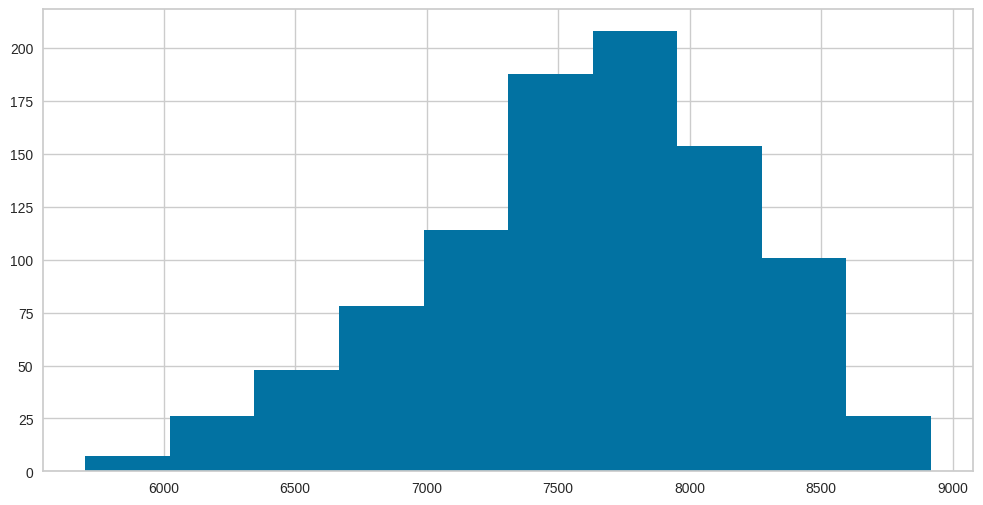

In [193]:
plt.figure(figsize=(12, 6)) # Define o tamanho da figura (largura, altura)
plt.hist(x = energia_norte['val_cargaenergiamwmed']);#histograma de ilesos

In [194]:
#scatter - grafico em dispersao
grafico = px.scatter_matrix(energia_norte, dimensions=['val_cargaenergiamwmed', 'dia_semana', 'mes', 'ano'], color='val_cargaenergiamwmed')
grafico.update_traces(diagonal_visible=False)
#criando grafico dinamico - importante ara perceber outliers
#combina no eixo x e y
#color = 'default - cor com base nos dados de default (0 e 1), que diz se a pessoa paga ou nao paga o empréstimo
#base_credit - origem do arquivo
#juncao de atributos em graficos
#[] - atributos da visualizacao nos gráficos
grafico.update_layout(height=800, width=1600) # Ajuste a altura e largura conforme necessário
grafico.show()

#Tratamento de valores inconsistentes (análise em dados errados e a correção destes valores)

In [195]:
energia_norte.describe()

,din_instante,val_cargaenergiamwmed,ano
count,951,950.000000,951.000000
mean,2024-04-20 00:00:00,7596.173278,2023.847529
min,2023-01-01 00:00:00,5703.008875,2023.000000
25%,2023-08-26 12:00:00,7237.792156,2023.000000
50%,2024-04-20 00:00:00,7657.003229,2024.000000
75%,2024-12-13 12:00:00,8033.731333,2024.000000
max,2025-08-08 00:00:00,8916.103083,2025.000000
std,NaN,610.082722,0.769752


In [196]:
#exemplo de outlier
energia_norte[energia_norte['val_cargaenergiamwmed'].isnull()]
#mesmo que seja um número alto e não tão comum, trata-se de um evento real, nesse caso, mantendo ele, é possível analisar o espectro geral

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed,dia_semana,mes,ano
3800,N,Norte,2025-08-08,NaN,Friday,August,2025


In [197]:
energia_norte[energia_norte['din_instante'].isnull()]

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed,dia_semana,mes,ano


In [198]:
energia_norte[energia_norte['dia_semana'].isnull()]

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed,dia_semana,mes,ano


In [199]:
energia_norte[energia_norte['mes'].isnull()]

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed,dia_semana,mes,ano


In [200]:
energia_norte[energia_norte['ano'].isnull()]

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed,dia_semana,mes,ano


Valores faltantes

In [201]:
energia_norte.isnull()

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed,dia_semana,mes,ano
0,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3784,False,False,False,False,False,False,False
3788,False,False,False,False,False,False,False
3792,False,False,False,False,False,False,False
3796,False,False,False,False,False,False,False


In [202]:
energia_norte.isnull().sum()

,0
id_subsistema,0
nom_subsistema,0
din_instante,0
val_cargaenergiamwmed,1
dia_semana,0
mes,0
ano,0


In [203]:
energia_norte = energia_norte.dropna(subset=['val_cargaenergiamwmed'])
energia_norte.isnull().sum()

,0
id_subsistema,0
nom_subsistema,0
din_instante,0
val_cargaenergiamwmed,0
dia_semana,0
mes,0
ano,0


#Divisão entre previsores e classe

In [204]:
#separando previsores e variável alvo
X_energia_norte = energia_norte[['nom_subsistema','dia_semana', 'mes', 'ano']]
y_energia_norte = energia_norte['val_cargaenergiamwmed']

print("Variáveis previsoras (X_acidente) shape:", X_energia_norte.shape)
print("Variável alvo (y_acidente) shape:", y_energia_norte.shape)

type(X_energia_norte)#vendo o tipo
type(y_energia_norte)#vendo o tipo

Variáveis previsoras (X_acidente) shape: (950, 4)
Variável alvo (y_acidente) shape: (950,)


pandas.core.series.Series

In [205]:
quantiles = y_energia_norte.quantile([0, 0.33, 0.66, 1])
bins = [quantiles[0], quantiles[0.33], quantiles[0.66], quantiles[1]]
labels = ['Baixa', 'Média', 'Alta']
y_energia_norte_categorizada = pd.cut(y_energia_norte, bins=bins, labels=labels, include_lowest=True)

#Label Encoder -> Tratar valores categoricos

In [206]:
from sklearn.preprocessing import LabelEncoder
#Biblioteca para conversao de dados categoricos parta numericos sendo possivel tratar os dados

In [207]:
label_encoder_energia = LabelEncoder()#objeto da classe

In [208]:
print(X_energia_norte[['nom_subsistema','dia_semana', 'mes', 'ano']])

     nom_subsistema dia_semana      mes   ano
0             Norte     Sunday  January  2023
4             Norte     Monday  January  2023
8             Norte    Tuesday  January  2023
12            Norte  Wednesday  January  2023
16            Norte   Thursday  January  2023
...             ...        ...      ...   ...
3780          Norte     Sunday   August  2025
3784          Norte     Monday   August  2025
3788          Norte    Tuesday   August  2025
3792          Norte  Wednesday   August  2025
3796          Norte   Thursday   August  2025

[950 rows x 4 columns]


In [209]:
#criando um label_encoder para cada um dos atributos
label_encoder_subsistema = LabelEncoder()
label_encoder_diasemana = LabelEncoder()
label_encoder_mes = LabelEncoder()

In [210]:
#acessando a variavel e aplicando o label_encoder para transformar
#para as colunas nao presentes, e pq ja sao numericas
X_energia_norte['nom_subsistema'] = label_encoder_subsistema.fit_transform(X_energia_norte['nom_subsistema'])
X_energia_norte['dia_semana'] = label_encoder_diasemana.fit_transform(X_energia_norte['dia_semana'])
X_energia_norte['mes'] = label_encoder_mes.fit_transform(X_energia_norte['mes'])

/tmp/ipython-input-2522321626.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2522321626.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2522321626.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [211]:
print(X_energia_norte[['nom_subsistema', 'dia_semana', 'mes']])

      nom_subsistema  dia_semana  mes
0                  0           3    4
4                  0           1    4
8                  0           5    4
12                 0           6    4
16                 0           4    4
...              ...         ...  ...
3780               0           3    1
3784               0           1    1
3788               0           5    1
3792               0           6    1
3796               0           4    1

[950 rows x 3 columns]


In [212]:
print(y_energia_norte)

0       5703.008875
4       6140.917875
8       6294.462208
12      6406.141458
16      6515.501875
           ...     
3780    7752.276167
3784    8425.650875
3788    8652.004083
3792    8640.126917
3796    8576.003833
Name: val_cargaenergiamwmed, Length: 950, dtype: float64


In [213]:
print(y_energia_norte_categorizada)

0       Baixa
4       Baixa
8       Baixa
12      Baixa
16      Baixa
        ...  
3780    Média
3784     Alta
3788     Alta
3792     Alta
3796     Alta
Name: val_cargaenergiamwmed, Length: 950, dtype: category
Categories (3, object): ['Baixa' < 'Média' < 'Alta']


In [214]:
print(y_energia_norte_categorizada[y_energia_norte_categorizada == 'Média'])

512     Média
516     Média
520     Média
524     Média
536     Média
        ...  
3664    Média
3696    Média
3724    Média
3752    Média
3780    Média
Name: val_cargaenergiamwmed, Length: 313, dtype: category
Categories (3, object): ['Baixa' < 'Média' < 'Alta']


In [215]:
print(y_energia_norte[512])

7411.62441667


In [216]:
#escalonando baixa, media e alta
label_encoder_energia_cat = LabelEncoder()
y_energia_norte_encoded = label_encoder_energia_cat.fit_transform(y_energia_norte_categorizada)
display(y_energia_norte_encoded)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2,

#Escalonamento dos valores

In [217]:
from sklearn.preprocessing import StandardScaler #para escalonamento de valores - padronizacao
scaler_energia = StandardScaler() #objeto
X_energia_norte_scaled = scaler_energia.fit_transform(X_energia_norte)#tranformando e escalonando - tem + duas dimensoes, por isso o escalonamento -> usado para escalar as features (variáveis preditoras)
X_energia_norte_scaled[0]

array([ 0.        , -0.00210582, -0.3978489 , -1.10076687])

# Divisão das bases em treinamento e teste

In [218]:
from sklearn.model_selection import train_test_split #importacao das bases

# Dividir os dados transformados (previsores) e a variável alvo
# test_size=0.25 -> 25% dos dados pra teste e 75% para treino
# random_state=0 garante que a divisão seja a mesma toda vez que o código for executado -> não randomiza nada
X_treino_energia_norte, X_teste_energia_norte, y_treino_energia_norte_encoded, y_teste_energia_norte_encoded = train_test_split(X_energia_norte_scaled, y_energia_norte_encoded, test_size=0.25, random_state=0)

print("treino (previsores):", X_treino_energia_norte.shape)
print("teste (previsores):", X_teste_energia_norte.shape)
print("treino (codificado):", y_treino_energia_norte_encoded.shape) #variável alvo
print("teste (codificado):", y_teste_energia_norte_encoded.shape) #variável alvo

treino (previsores): (712, 4)
teste (previsores): (238, 4)
treino (codificado): (712,)
teste (codificado): (238,)


#Árvore de decisão - não é bom pois os dados são massivos e a árvore fica extensa e sem poder ler

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
#Criando árvore de decisão
arvore_energia = DecisionTreeClassifier(criterion='entropy', random_state=0)
#DecisionTreeClassifier objeto que foi importado
#critério - criterion='entropy'
arvore_energia.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#.fit - encaixar os dados no algoritmo
#gerando todos os calculos

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [221]:
arvore_energia.feature_importances_
#.feature_importances_ - retorna a importancia de cada um dos atributos
#ou seja, o que tem o maior ganho d e informação

array([0.        , 0.24312841, 0.49051722, 0.26635437])

In [222]:
arvore_energia.classes_
#lista de valores das classes
#no caso, os tipos de acidente

array([0, 1, 2])

In [223]:
from sklearn import tree
#gerando o grafico da arvore de decisao
previsores = ['nom_subsistema','dia_semana', 'mes', 'ano'] # Update feature names to match the scaled data
#para melhor visualizacao, atributos em lista
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(100,100)) # Increased figure size
#definindo uma figura
tree.plot_tree(arvore_energia, feature_names=previsores, class_names = label_encoder_energia_cat.classes_, filled=True);#passando o
#filled=True - preenchendo o grafico para melhor visualizacao
#importanto tudo no metodo da arvore
#class_names = arvore_risco_credito.classes_ - pra falar se o risco é alto, moderado ou baixo

#Random Forest

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
#.ensemble - unir varios algoritmos em um so pacote

In [225]:
 X_treino_energia_norte.shape, y_treino_energia_norte_encoded.shape

((712, 4), (712,))

In [226]:
X_teste_energia_norte.shape, y_teste_energia_norte_encoded.shape

((238, 4), (238,))

In [227]:
from sklearn.ensemble import RandomForestClassifier
#n_estimators=40 - numero de arvores de decisao que vai criar - voto da maioria
#100 é o padrão
#Nem sempre a maior quantidade de ávores significa parametros melhores
random_forest_classifier_energia = RandomForestClassifier(n_estimators=40, random_state = 0)
random_forest_classifier_energia.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#passando os atrributos como parametros

RandomForestClassifier(n_estimators=40, random_state=0)

In [228]:
previsoes_rf = random_forest_classifier_energia.predict(X_teste_energia_norte) #gerando as previsoes
previsoes_rf

array([0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1,
       2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0,
       2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0,
       1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1])

In [229]:
y_energia_norte_categorizada

,val_cargaenergiamwmed
0,Baixa
4,Baixa
8,Baixa
12,Baixa
16,Baixa
...,...
3780,Média
3784,Alta
3788,Alta
3792,Alta


In [230]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score
#passando as respoista reais e as previsoes para a metrica
print("Accuracy:", accuracy_score(y_teste_energia_norte_encoded, previsoes_rf))
print("F1 Score:", f1_score(y_teste_energia_norte_encoded, previsoes_rf, average='weighted'))
print("Recall Score:", recall_score(y_teste_energia_norte_encoded, previsoes_rf, average='weighted'))
print(classification_report(y_teste_energia_norte_encoded, previsoes_rf))

#macro analisa o desempenho em cada classe
#weighted analisa o desempenho geral com base no tamanho

Accuracy: 0.7352941176470589
F1 Score: 0.7372063095795347
Recall Score: 0.7352941176470589
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        82
           1       0.78      0.79      0.79        72
           2       0.63      0.68      0.65        84

    accuracy                           0.74       238
   macro avg       0.74      0.74      0.74       238
weighted avg       0.74      0.74      0.74       238



0.7352941176470589

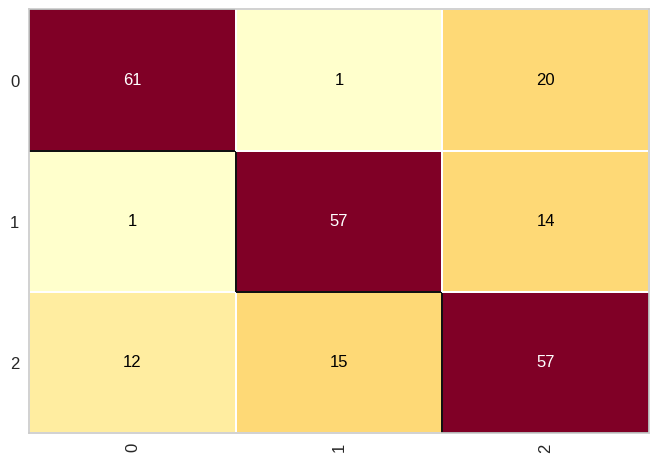

In [231]:
from yellowbrick.classifier import ConfusionMatrix
#matriz de confusao
cm = ConfusionMatrix(random_forest_classifier_energia)
cm.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
cm.score(X_teste_energia_norte, y_teste_energia_norte_encoded)
#encaixando os atributos como parametro e verificando as metricas

#SVM

In [232]:
from sklearn.svm import SVC #svc - nome da classe a ser importada

In [233]:
X_treino_energia_norte.shape, y_treino_energia_norte_encoded.shape #registros treinamento

((712, 4), (712,))

In [234]:
X_teste_energia_norte.shape, y_teste_energia_norte_encoded.shape #registros de teste

((238, 4), (238,))

In [235]:
svm_energia = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
#kernel='rbf' - tipo do Kernel - base de dados diferentes requerem tipos diferentes de Kernel
#faz o teste e vê o melhor
#random_state=1 - para que sempre que execute tenha o mesmo resultado
#C = 2.0 - maior o valor, mais perfeita a divisão dos dados
svm_energia.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#treinamento

SVC(C=2.0, random_state=1)

In [236]:
previsoes_svm = svm_energia.predict(X_teste_energia_norte)#treinamento
previsoes_svm

array([0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1,
       2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0,
       2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0,
       2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2])

In [237]:
y_teste_energia_norte_encoded#respostas reais
#para fins de comparação

array([0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1,
       0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2,
       1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1,
       2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2,
       1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1,
       1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1])

In [238]:
from sklearn.metrics import accuracy_score, classification_report#metricas
accuracy_score(y_teste_energia_norte_encoded, previsoes_svm)

0.6050420168067226

In [239]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score#metricas
print("Accuracy:", accuracy_score(y_teste_energia_norte_encoded, previsoes_svm))
print("F1 Score:", f1_score(y_teste_energia_norte_encoded, previsoes_svm, average='weighted')) # Use weighted average for multiclass
print("Recall Score:", recall_score(y_teste_energia_norte_encoded, previsoes_svm, average='weighted')) # Use weighted average for multiclass
print(classification_report(y_teste_energia_norte_encoded, previsoes_svm))

#macro analisa o desempenho em cada classe
#weighted analisa o desempenho geral com base no tamanho

Accuracy: 0.6050420168067226
F1 Score: 0.6123467423191399
Recall Score: 0.6050420168067226
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        82
           1       0.76      0.62      0.69        72
           2       0.46      0.60      0.52        84

    accuracy                           0.61       238
   macro avg       0.64      0.61      0.62       238
weighted avg       0.63      0.61      0.61       238



0.6050420168067226

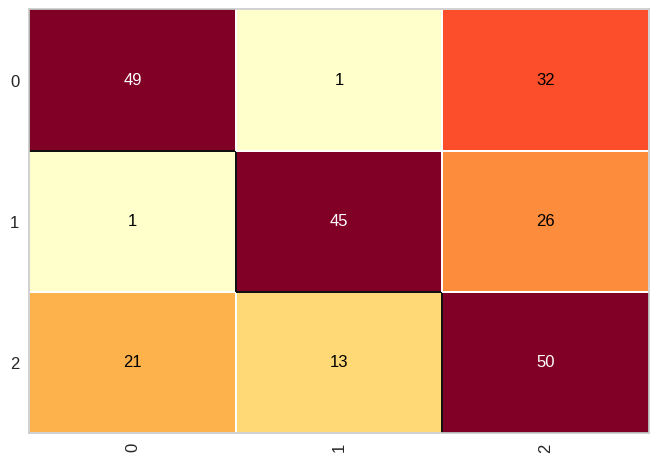

In [240]:
from yellowbrick.classifier import ConfusionMatrix
#matriz de confusao
cm = ConfusionMatrix(svm_energia)
cm.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
cm.score(X_teste_energia_norte, y_teste_energia_norte_encoded)
#encaixando os atributos como parametro e verificando as metricas

# Redes neurais artificiais

In [241]:
from sklearn.neural_network import MLPClassifier
#MLPClassifier - Multi Layer Perceptron

In [242]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [243]:
#A grade de parâmetros pro grid ver o melhor
parameter_grid = {
    'hidden_layer_sizes': [(30, 30, 30, 30), (50, 50, 50, 50), (70, 70, 70, 70)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.01, 0.0003, 0.03],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

In [244]:
#Verifica o melhor padrão na rede neural por meio da validação  - não apicado no momento deevido a demora (opcional)
# Criando o objeto GridSearchCV
#grid_search = GridSearchCV(MLPClassifier(max_iter=1500, tol=0.0001), parameter_grid, cv=5) # Adicionado n_jobs=-1 para usar todos os cores disponíveis
#grid_search.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#treinando com validação cruzada

#Melhor parametro e melhor resultado
#print("Melhores parâmetros encontrados:")
#print(grid_search.best_params_)
#print("\nMelhor acurácia na validação cruzada:")
#print(grid_search.best_score_)

In [245]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
# o 3 vem do treinamento, 3 atributos e a saída vem da sapida do teste, 0 ou 1 (paga ou nao)
rede_neural_energia = MLPClassifier(max_iter=1500, verbose=True, tol=0.00001,
                                   #max_iter=1500 - para iteracoes para covergir o erro
                                   #verbose=True - para que o algoritmo mostre as mensagem epoca por epoca
                                   #loss - erro (objetivo é diminuir)
#configurado para ir ate a 1500, mas para na 742, nao precisa ir ate 1500
#Iteration 742, loss = 0.00212129
#Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
#pelo motivo de ele não conseguir melhorar mais o erro, já foi o máximo
#tol=0.0000100 - para que ele possa ir mais, só configurar o parâmetro tol
                                   solver = 'adam', activation = 'tanh', learning_rate = 'constant',
                                   #activation = 'relu'- para cenarios mais complexos, no lugar do sigmoide
                                   hidden_layer_sizes = (70, 70, 70))
                                    #nem sempre uma grande quantidade de neurônios na camada oculta, significa melhor taxa de acerto
#hidden_layer_sizes = (20,20) - duas camadas ocultas e cada uma com 20 neurônios
rede_neural_energia.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#faz ajuste dos pesos e encaixa os dados

Iteration 1, loss = 1.07832587
Iteration 2, loss = 0.91532395
Iteration 3, loss = 0.86007439
Iteration 4, loss = 0.84512826
Iteration 5, loss = 0.83943542
Iteration 6, loss = 0.83855337
Iteration 7, loss = 0.83693643
Iteration 8, loss = 0.83396632
Iteration 9, loss = 0.82836209
Iteration 10, loss = 0.82165724
Iteration 11, loss = 0.81641615
Iteration 12, loss = 0.81358015
Iteration 13, loss = 0.80894527
Iteration 14, loss = 0.80349729
Iteration 15, loss = 0.79897840
Iteration 16, loss = 0.79412634
Iteration 17, loss = 0.79036121
Iteration 18, loss = 0.78538203
Iteration 19, loss = 0.77915539
Iteration 20, loss = 0.77463748
Iteration 21, loss = 0.76960919
Iteration 22, loss = 0.76372869
Iteration 23, loss = 0.75984552
Iteration 24, loss = 0.75660785
Iteration 25, loss = 0.75066866
Iteration 26, loss = 0.74711300
Iteration 27, loss = 0.74238839
Iteration 28, loss = 0.73884145
Iteration 29, loss = 0.73760822
Iteration 30, loss = 0.73308088
Iteration 31, loss = 0.73183366
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(70, 70, 70), max_iter=1500,
              tol=1e-05, verbose=True)

In [246]:
previsoes_nn = rede_neural_energia.predict(X_teste_energia_norte)#previsoes
previsoes_nn

array([0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1,
       0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 2, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1,
       1, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0,
       1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2,
       0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1])

In [247]:
y_teste_energia_norte_encoded

array([0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1,
       0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2,
       1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1,
       2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2,
       1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1,
       1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1])

In [248]:
from sklearn.metrics import accuracy_score, classification_report#metricas
accuracy_score(y_teste_energia_norte_encoded, previsoes_nn)

0.7563025210084033

In [249]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score#metricas
print("Accuracy:", accuracy_score(y_teste_energia_norte_encoded, previsoes_nn))
print("F1 Score:", f1_score(y_teste_energia_norte_encoded, previsoes_nn, average='weighted'))
print("Recall Score:", recall_score(y_teste_energia_norte_encoded, previsoes_nn, average='weighted'))
print(classification_report(y_teste_energia_norte_encoded, previsoes_nn))
#macro analisa o desempenho em cada classe
#weighted analisa o desempenho geral com base no tamanho

Accuracy: 0.7563025210084033
F1 Score: 0.756363002115302
Recall Score: 0.7563025210084033
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        82
           1       0.77      0.85      0.81        72
           2       0.67      0.68      0.67        84

    accuracy                           0.76       238
   macro avg       0.76      0.76      0.76       238
weighted avg       0.76      0.76      0.76       238



# KNN

In [250]:
from sklearn.neighbors import KNeighborsClassifier

In [251]:
knn_energia = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 3)
#KNeighborsClassifier - classificação kNN
#n_neighbors=5 - parametro de numero de vizinhos, definindo o valor default - 5
#metric='minkowski' - maneira que o cálculo da distancia será feito
#p = 2 - inteiro - parametro de força, p = 2 para utilizar a distancia euclidiana
#metric='minkowski', p = 2 - nao precisam ser passados pois sao padroes pra se trabalhar com a distancia euclidiana
knn_energia.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#encaixando e armazenando os dados

KNeighborsClassifier(p=3)

In [252]:
previsoes = knn_energia.predict(X_teste_energia_norte)#fazendo as previsoes
previsoes

array([0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1,
       2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 0, 1,
       2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1])

In [253]:
y_teste_energia_norte_encoded

array([0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1,
       0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2,
       1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1,
       2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2,
       1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1,
       1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1])

In [254]:
from sklearn.metrics import accuracy_score, classification_report
#accuracy
accuracy_score(y_teste_energia_norte_encoded, previsoes) #padronização
#respostas reais e previsoes sendo passadas

0.6638655462184874

In [255]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score#metricas

# Generate predictions for KNN (assuming 'previsoes' already holds KNN predictions)
# previsoes = knn_credit.predict(X_teste_energia_norte) # This line is commented out assuming previsoes is already calculated for KNN

print("Accuracy (KNN):", accuracy_score(y_teste_energia_norte_encoded, previsoes))
print("F1 Score (KNN):", f1_score(y_teste_energia_norte_encoded, previsoes, average='weighted'))
print("Recall Score (KNN):", recall_score(y_teste_energia_norte_encoded, previsoes, average='weighted'))
print(classification_report(y_teste_energia_norte_encoded, previsoes))

#macro analisa o desempenho em cada classe
#weighted analisa o desempenho geral com base no tamanho

Accuracy (KNN): 0.6638655462184874
F1 Score (KNN): 0.6594497584817764
Recall Score (KNN): 0.6638655462184874
              precision    recall  f1-score   support

           0       0.68      0.63      0.66        82
           1       0.73      0.85      0.78        72
           2       0.58      0.54      0.56        84

    accuracy                           0.66       238
   macro avg       0.66      0.67      0.67       238
weighted avg       0.66      0.66      0.66       238



0.6638655462184874

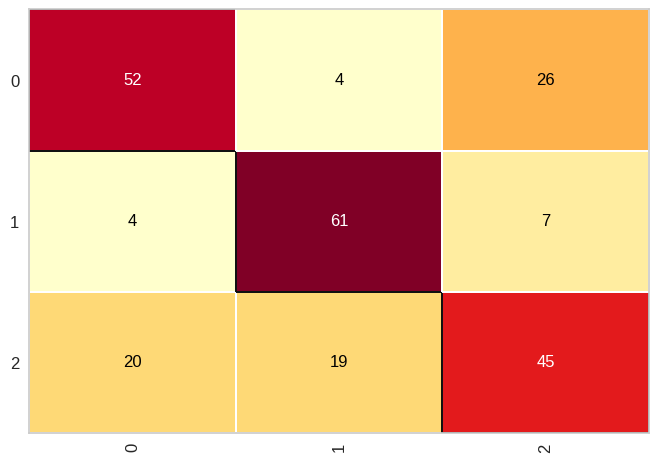

In [256]:
from yellowbrick.classifier import ConfusionMatrix
#matriz de confusão
cm = ConfusionMatrix(knn_energia)
cm.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
cm.score(X_teste_energia_norte, y_teste_energia_norte_encoded)

# Regressão logística

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
logistic_energia = LogisticRegression(random_state = 1)
#criando a regressao logistica
#random_state = 1 - para ter o mesmo resultado em toda execução
logistic_energia.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#encaixando os atributos
#Treinamento

LogisticRegression(random_state=1)

In [259]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score#metricas

# Generate predictions for Logistic Regression
previsoes_logistic = logistic_energia.predict(X_teste_energia_norte)

print("Accuracy:", accuracy_score(y_teste_energia_norte_encoded, previsoes_logistic))
print("F1 Score:", f1_score(y_teste_energia_norte_encoded, previsoes_logistic, average='weighted'))
print("Recall Score:", recall_score(y_teste_energia_norte_encoded, previsoes_logistic, average='weighted'))
print(classification_report(y_teste_energia_norte_encoded, previsoes_logistic))

#macro analisa o desempenho em cada classe
#weighted analisa o desempenho geral com base no tamanho

Accuracy: 0.5294117647058824
F1 Score: 0.5180162651055769
Recall Score: 0.5294117647058824
              precision    recall  f1-score   support

           0       0.57      0.60      0.58        82
           1       0.55      0.69      0.61        72
           2       0.44      0.32      0.37        84

    accuracy                           0.53       238
   macro avg       0.52      0.54      0.52       238
weighted avg       0.52      0.53      0.52       238



0.5294117647058824

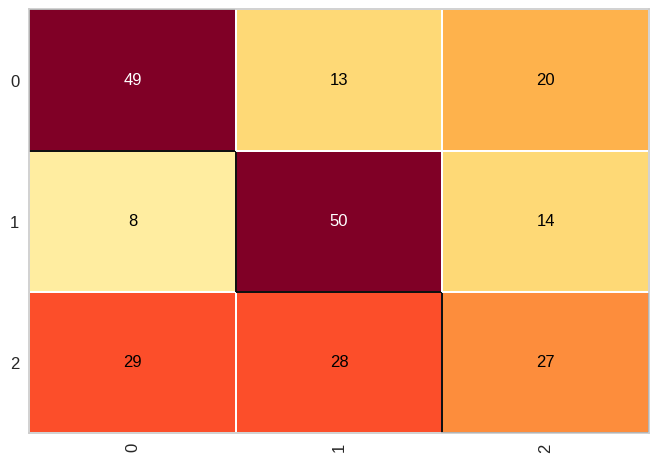

In [260]:
from yellowbrick.classifier import ConfusionMatrix
#matriz de confusão
cm = ConfusionMatrix(logistic_energia)
cm.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
cm.score(X_teste_energia_norte, y_teste_energia_norte_encoded)

In [261]:
metrics = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_teste_energia_norte_encoded, random_forest_classifier_energia.predict(X_teste_energia_norte)),
        'F1 Score': f1_score(y_teste_energia_norte_encoded, random_forest_classifier_energia.predict(X_teste_energia_norte), average='weighted'),
        'Recall Score': recall_score(y_teste_energia_norte_encoded, random_forest_classifier_energia.predict(X_teste_energia_norte), average='weighted')
    },
    'SVM': {
        'Accuracy': accuracy_score(y_teste_energia_norte_encoded, svm_energia.predict(X_teste_energia_norte)),
        'F1 Score': f1_score(y_teste_energia_norte_encoded, svm_energia.predict(X_teste_energia_norte), average='weighted'),
        'Recall Score': recall_score(y_teste_energia_norte_encoded, svm_energia.predict(X_teste_energia_norte), average='weighted')
    },
    'Rede Neural': {
        'Accuracy': accuracy_score(y_teste_energia_norte_encoded, rede_neural_energia.predict(X_teste_energia_norte)),
        'F1 Score': f1_score(y_teste_energia_norte_encoded, rede_neural_energia.predict(X_teste_energia_norte), average='weighted'),
        'Recall Score': recall_score(y_teste_energia_norte_encoded, rede_neural_energia.predict(X_teste_energia_norte), average='weighted')
    },
    'KNN': {
        'Accuracy': accuracy_score(y_teste_energia_norte_encoded, knn_energia.predict(X_teste_energia_norte)),
        'F1 Score': f1_score(y_teste_energia_norte_encoded, knn_energia.predict(X_teste_energia_norte), average='weighted'),
        'Recall Score': recall_score(y_teste_energia_norte_encoded, knn_energia.predict(X_teste_energia_norte), average='weighted')
    },
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_teste_energia_norte_encoded, logistic_energia.predict(X_teste_energia_norte)),
        'F1 Score': f1_score(y_teste_energia_norte_encoded, logistic_energia.predict(X_teste_energia_norte), average='weighted'),
        'Recall Score': recall_score(y_teste_energia_norte_encoded, logistic_energia.predict(X_teste_energia_norte), average='weighted')
    }
}
metrics_df = pd.DataFrame(metrics).T
display(metrics_df)

,Accuracy,F1 Score,Recall Score
Random Forest,0.735294,0.737206,0.735294
SVM,0.605042,0.612347,0.605042
Rede Neural,0.756303,0.756363,0.756303
KNN,0.663866,0.659450,0.663866
Logistic Regression,0.529412,0.518016,0.529412


In [262]:
#Usar para limpar a RAM
#import gc

#if 'energia' in globals():
#  del energia
#  gc.collect()
#  print("Variável 'energia' removida e memória liberada.")
#else:
#  print("Variável 'energia' não definida.")